# Probabilistički grafički modeli - 2. deo

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Učitavanje podataka o pacijentima
# Izvor: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
data = pd.read_csv('data/heart.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Diskretizacija kontinualnih vrednosti

In [5]:
digitized_df = None
initialized = False

# Kontinualne vrednosti i vrednosti sa velikim opsegom nalaze u kolonama 3, 4, 7, 9
col_ind = [0, 3, 4, 7, 9]
for col_index in col_ind:
    try:
        col = data.columns[col_index]
        column_data = data[col]
        percentile_points = np.linspace(0,1,10) * 100
        bins = np.percentile(column_data.dropna(), percentile_points)
        digitized_data = np.digitize(column_data, bins).astype('int')
        col_df = pd.DataFrame(data=np.array([digitized_data]).T, columns=[col])
    #     col_df

        if not initialized:
            initialized = True
            digitized_df = col_df
        else:
            digitized_df = digitized_df.join(col_df)
    except:
        print(f'Failed to process column: {col}')


In [6]:
digitized_df

,age,trtbps,chol,thalachh,oldpeak
0,8,8,4,5,8
1,1,6,6,9,9
2,1,6,2,8,7
3,5,3,5,9,5
4,6,3,9,7,5
...,...,...,...,...,...
298,6,8,5,2,4
299,2,2,7,3,6
300,9,8,2,3,9
301,6,6,1,1,6


Spajanje diskretizovanih kolona sa ostalim kolonama

In [7]:
prepared_dataset = data.iloc[:,[1,2,5,6,8,10,11,12]].join(digitized_df).join(data.iloc[:,[13]])
prepared_dataset

,sex,cp,fbs,restecg,exng,slp,caa,thall,age,trtbps,chol,thalachh,oldpeak,output
0,1,3,1,0,0,0,0,1,8,8,4,5,8,1
1,1,2,0,1,0,0,0,2,1,6,6,9,9,1
2,0,1,0,0,0,2,0,2,1,6,2,8,7,1
3,1,1,0,1,0,2,0,2,5,3,5,9,5,1
4,0,0,0,1,1,2,0,2,6,3,9,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,6,8,5,2,4,0
299,1,3,0,1,0,1,0,3,2,2,7,3,6,0
300,1,0,1,1,0,1,2,3,9,8,2,3,9,0
301,1,0,0,1,1,1,1,3,6,6,1,1,6,0


In [8]:
prepared_dataset.describe()

,sex,cp,fbs,restecg,exng,slp,caa,thall,age,trtbps,chol,thalachh,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,5.135314,5.310231,5.029703,5.052805,5.392739,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,2.594857,2.623656,2.602045,2.606128,2.210948,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,5.000000,6.000000,5.000000,5.000000,5.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,7.000000,8.000000,7.000000,7.000000,7.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Učenje strukture Bajesovske mreže

In [9]:
from pgmpy.estimators import HillClimbSearch, BicScore, PC, TreeSearch, ExhaustiveSearch
est = HillClimbSearch(prepared_dataset)
best_model = est.estimate(scoring_method=BicScore(prepared_dataset))

/Users/aleksandarveljkovic/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                    | 8/1000000 [00:00<30:00:00,  9.26it/s]


Grafički prikaz naučene strukture

In [10]:
import networkx as nx

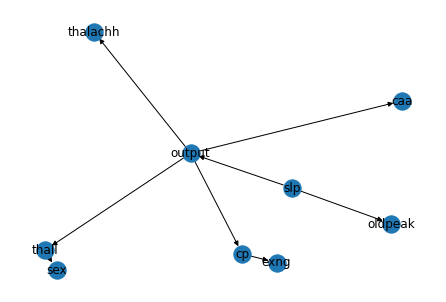

In [11]:
G = nx.DiGraph(directed=True)
G.add_edges_from(best_model.edges)
nx.draw(G, with_labels=True)

In [12]:
# Čvorovi koji nisu spojeni granama smatraju se nezavisnim od ostalih promenljivih
# i kao takvi ne ulaze u konstruisani model
best_model.nodes()

NodeView(('sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output'))

In [13]:
import numpy as np
selected_nodes = list(set(np.array([[x,y] for (x,y) in best_model.edges]).ravel()))
selected_nodes

['oldpeak', 'slp', 'sex', 'output', 'thall', 'thalachh', 'cp', 'exng', 'caa']

In [14]:
reduced_dataset = prepared_dataset.loc[:,selected_nodes]
reduced_dataset

,oldpeak,slp,sex,output,thall,thalachh,cp,exng,caa
0,8,0,1,1,1,5,3,0,0
1,9,0,1,1,2,9,2,0,0
2,7,2,0,1,2,8,1,0,0
3,5,2,1,1,2,9,1,0,0
4,5,2,0,1,2,7,0,1,0
...,...,...,...,...,...,...,...,...,...
298,4,1,0,0,3,2,0,1,0
299,6,1,1,0,3,3,3,0,0
300,9,1,1,0,3,3,0,0,2
301,6,1,1,0,3,1,0,1,1


Izvdajanje podskupova za trening i test

In [15]:
from random import sample

n = reduced_dataset.shape[0]
train_size = 0.8

available_ind = [x for x in range(n)]
train_set_ind = sample(available_ind, int(train_size * n))
test_set_ind = list(set(available_ind) - set(train_set_ind))

In [16]:
X_train = reduced_dataset.iloc[train_set_ind,:]
X_train

,oldpeak,slp,sex,output,thall,thalachh,cp,exng,caa
260,6,1,0,0,3,7,0,1,2
252,8,1,0,0,2,1,0,0,3
279,9,1,1,0,2,2,0,1,1
125,5,2,0,1,2,9,1,0,0
265,4,2,1,0,2,3,0,1,1
...,...,...,...,...,...,...,...,...,...
40,7,2,0,1,2,3,2,0,1
129,4,2,0,1,2,2,1,1,1
78,3,2,1,1,2,9,1,0,0
136,3,2,0,1,2,1,2,0,0


Konstrukcija Bajesovske mreže koja odgovara definisanoj strukturi

In [17]:
X_test = reduced_dataset.iloc[test_set_ind,:]
X_test

,oldpeak,slp,sex,output,thall,thalachh,cp,exng,caa
256,9,1,1,0,3,2,0,1,2
3,5,2,1,1,2,9,1,0,0
264,3,1,1,0,2,1,0,1,1
9,7,2,1,1,2,8,2,0,0
10,6,2,1,1,2,6,0,0,0
...,...,...,...,...,...,...,...,...,...
243,6,1,1,0,3,1,0,1,1
118,3,2,0,1,2,8,1,0,0
119,3,1,0,1,2,5,0,1,0
120,8,1,0,1,2,2,0,0,2


In [18]:
from pgmpy.models import BayesianNetwork

In [19]:
bn = BayesianNetwork()
bn.add_edges_from(best_model.edges)

Treniranje konstruisanog modela

In [20]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

bn.fit(data=X_train, estimator=MaximumLikelihoodEstimator)

In [21]:
bn.check_model()

True

Evaluacija modela

In [22]:
from pgmpy.inference import VariableElimination

In [24]:
correct = 0
total = 0
target_variable = 'output'

inference = VariableElimination(bn)
y = X_test.loc[:,[target_variable]].values.ravel()
y_pred = []

for index, row in X_test.iterrows():
    evidence = {}
    for col in X_test.columns:
        if col != target_variable:
            evidence[col] = row[col]
        
    res = inference.map_query(variables=[target_variable], evidence=evidence, show_progress=False)
    y_pred.append(res[target_variable])
    
    total += 1
    if row[target_variable] == res[target_variable]:
        correct += 1
        
    print(f'{correct}/{total}: {correct/total}')
    

1/1: 1.0
2/2: 1.0
3/3: 1.0
4/4: 1.0
5/5: 1.0
6/6: 1.0
7/7: 1.0
8/8: 1.0
9/9: 1.0
10/10: 1.0
11/11: 1.0
11/12: 0.9166666666666666
12/13: 0.9230769230769231
13/14: 0.9285714285714286
14/15: 0.9333333333333333
14/16: 0.875
15/17: 0.8823529411764706
16/18: 0.8888888888888888
17/19: 0.8947368421052632
18/20: 0.9
19/21: 0.9047619047619048
20/22: 0.9090909090909091
21/23: 0.9130434782608695
21/24: 0.875
22/25: 0.88
22/26: 0.8461538461538461
22/27: 0.8148148148148148
23/28: 0.8214285714285714
24/29: 0.8275862068965517
25/30: 0.8333333333333334
26/31: 0.8387096774193549
27/32: 0.84375
28/33: 0.8484848484848485
29/34: 0.8529411764705882
30/35: 0.8571428571428571
30/36: 0.8333333333333334
31/37: 0.8378378378378378
32/38: 0.8421052631578947
33/39: 0.8461538461538461
34/40: 0.85
35/41: 0.8536585365853658
36/42: 0.8571428571428571
37/43: 0.8604651162790697
38/44: 0.8636363636363636
39/45: 0.8666666666666667
40/46: 0.8695652173913043
41/47: 0.8723404255319149
41/48: 0.8541666666666666
42/49: 0.857142

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y, y_pred)

array([[25,  3],
       [ 8, 25]])